# HOMEWORK 2
*Mètodes numèrics*

**1.- Revisar els exemples del mètode numèric proposat per R. Feynmann per a resoldre les equacions
del moviment i la seva implementació en python (script o Google Colab) així com el material
discutit a classe durant aquesta setmana.**

**a) Escriure les equacions que descriuen l'evolució de la posició i de la velocitat en aquest mètode
(en general, no per un exemple específic) i compareu-les amb les equacions corresponents al
mètode de velocity Verlet.**


En el primer pas del mètode de Feynman calculem la velocitat a la meitat del diferencial de temps que fem servir i a partir d'aquesta velocitat calculem la posició passat el diferencial de temps.

Calculem una nova velocitat a partir de la velocitat inicial fent servir l'acceleració i dt/2. Descrivim aquesta velocitat com "half kick" (hk).

$v_{hk} = v(0)+\frac{dt}{2}\cdot a$

La nova posició es calcula aplicant el diferencial de temps complet és a dir t+dt. Però, per calcular la posició fem servir la velocitat que hem calculat a la meitat de l'interval de temps. També es calcula una nova acceleració en aquest pas. L'equació espacial és:

$x(1) = x(0)+dt\cdot v_{hk}$

Pels següents passos del mètode fem servir les mateixes equacions, però, com ja hem calculat la velocitat a la meitat del diferencial de temps ara en els següents passos hem de sumar el diferencial de temps complet. Per tant, calculem la nova velocitat "half kick" amb la velocitat anterior i la nova acceleració que calculem a partir de la posició anterior. Tant l'equació de velocitat com de posició queden així dintre del codi de programació:

$v_{hk} = v_{hk} +{dt}\cdot a$

$x(i+1) = x(i)+dt\cdot v_{hk}$

Només definim x en funció de i perquè anem canviant constantment la velocitat i l'acceleració dintre del bucle i només guardem la posició per fer una gràfica en funció del temps.

Si anem al mètode de velocity Verlet trobem que les equacions són diferents, no es té en compte la velocitat a la meitat del diferencial de temps sinó que es calcula tenint en compte tot l'interval de temps igual que en l'equació de posició. El que fa diferent el mètode de Verlet és que calcula la velocitat a partir de l'acceleració mitjana entre els dos punts. Una vegada calculat el terme mitjà de l'acceleració gràcies a la segona llei de Newton es pot definir la velocitat. Les equacions queden així:

$x(i) = x(i-1)+ v(i-1) \cdot dt+ \frac {a(i-1)}{2}\cdot dt^2$

$v(i) = v(i-1)+dt\cdot a_m$

On definim la mitjana de l'acceleració com:

$a_m = \frac{a(i-1)+a(i)}{2}$

Com veiem per la posició i la velocitat fem servir les equacions corresponents a un moviment rectilini uniformement accelerat, però amb la correcció que implica la mitjana de l'acceleració en la velocitat. En canvi, en el mètode de Feynman com hem fet certes consideracions obtenim que l'acceleració és igual a la posició i utilitzant aquesta velocitat de mig camí, obtenim equacions una mica diferents. Els dos mètodes són igual de vàlids i són equivalents matemàticament, per tant, serveixen per resoldre problemes de moviment a través de les lleis de Newton.

**b) En el programa d'exemple del mètode de Velocity Verlet (i en el del mètode d'Euler també) en
cada pas de temps dt avaluem l'energia total (potencial i cinètica) per tal de verificar la conservació
de l'energia. En canvi, això no està implementat en els exemples del mètode proposat per
Feynmann. Perquè? Proposa una modificació que implementi aquest càlcul.**


En el mètode de Feynman no calculem l'energia perquè estem avaluant la posició i la velocitat en moments de temps diferents i no seria correcte calcular l'energia total del sistema amb aquests valors. No obstant això, aquest mètode està dissenyat per mantenir l'energia conservada de manera natural a llarg termini. Això és a causa de les equacions que estem aplicant, l'energia anirà baixant i quan arribi a un mínim tornarà a pujar tal com ho fan la posició i la velocitat. En canvi, els altres dos mètodes sí que calculen l'energia perquè tenim la posició i la velocitat al mateix punt i són mètodes que tenen més dificultat per mantenir l'energia de manera precisa. A continuació, presentem el codi de programació d'un moviment harmònic pel mètode de Feynman amb les variacions per representar l'energia.

In [ ]:
#Importem llibreries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Definim la partícula amb les consideracions de Feynman
# massa
m = 1.0
# Període en ns
T = 1.0
#Freqüència
w = 2.0*np.pi/T
#Constant de força
k=m*w*w
#Condicions inicials
x0=1.0
v0=0.0
# Energia inicial
E0=(m/2.0)*v0*v0+(k/2)*x0*x0

#Intervals de temps
dt=0.1
ntot=50
print('Simulation time will be',dt*ntot,' sec')

Simulation time will be 5.0  sec


In [ ]:
#Posem tot a cero
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
t = np.zeros(ntot+1)

#Condicions inicials
t[0] = 0.0
x[0] = x0
v[0] = v0

#Acceleració inicial
a = -x[0]

print("At t=0, x=",x[0],", v=",v[0],", a=",a)

At t=0, x= 1.0 , v= 0.0 , a= -1.0


In [ ]:
#  Calcul velocitat a la meitat de dt
v_hk = v[0]+(dt/2.0)*a
print("v (half step)=",v_hk)
# Nova posició i acceleració en el primer pas amb temps t+dt
x[1] = x[0]+dt*v_hk
t[1] = t[0]+dt
a = -x[1]
i=1
print("step",i,", x=",x[i],"a=",a)

v (half step)= -0.05
step 1 , x= 0.995 a= -0.995


In [ ]:
while i<ntot:
    # Calcula l'acceleració a la posició actual
    a = -x[i]
	  #Canvi de velocitat de t-dt/2 a t+dt/2
    v_hk = v_hk+a*dt
    # Nova posició a t+dt
    x[i+1] = x[i]+dt*v_hk
    #Actualitzar el temps
    t[i+1] = t[i]+dt
    #Actualitzar el contador
    i=i+1
	  #Mostrar les dades calculades
    print('Step',i,' t= ',round(t[i],3),' x=',round(x[i],3))

Step 2  t=  0.2  x= 0.98
Step 3  t=  0.3  x= 0.955
Step 4  t=  0.4  x= 0.921
Step 5  t=  0.5  x= 0.877
Step 6  t=  0.6  x= 0.825
Step 7  t=  0.7  x= 0.765
Step 8  t=  0.8  x= 0.696
Step 9  t=  0.9  x= 0.621
Step 10  t=  1.0  x= 0.54
Step 11  t=  1.1  x= 0.453
Step 12  t=  1.2  x= 0.362
Step 13  t=  1.3  x= 0.267
Step 14  t=  1.4  x= 0.169
Step 15  t=  1.5  x= 0.07
Step 16  t=  1.6  x= -0.03
Step 17  t=  1.7  x= -0.13
Step 18  t=  1.8  x= -0.228
Step 19  t=  1.9  x= -0.324
Step 20  t=  2.0  x= -0.417
Step 21  t=  2.1  x= -0.506
Step 22  t=  2.2  x= -0.589
Step 23  t=  2.3  x= -0.667
Step 24  t=  2.4  x= -0.738
Step 25  t=  2.5  x= -0.802
Step 26  t=  2.6  x= -0.857
Step 27  t=  2.7  x= -0.905
Step 28  t=  2.8  x= -0.943
Step 29  t=  2.9  x= -0.971
Step 30  t=  3.0  x= -0.99
Step 31  t=  3.1  x= -0.999
Step 32  t=  3.2  x= -0.998
Step 33  t=  3.3  x= -0.987
Step 34  t=  3.4  x= -0.966
Step 35  t=  3.5  x= -0.936
Step 36  t=  3.6  x= -0.896
Step 37  t=  3.7  x= -0.847
Step 38  t=  3.8  x=

Els resultats coincideixen amb els valors donats per Feynman.

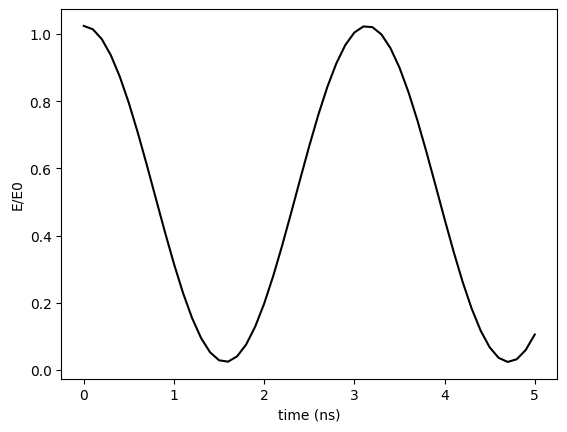

In [ ]:
#Energia corresponent a cada pas
E=(m/2.0)*v_hk*v_hk+(k/2)*x*x
#Relació energia de cada pas amb energia inicial (E/E0)
RE=E/E0
#Construim la gràfica
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Mostrar la gràfica
plt.show()


Com podem veure l'energia es conserva quan la relació entre les energies arriba a 1. També podem veure el moviment harmònic del motlle. Amb aquest mètode com la posició i la velocitat disminueixen i després tornen a créixer, podem veure mínims de com la posició i la velocitat s'aproximen a zero. Posteriorment com es tornen negatius tornen a créixer i veiem aquest canvi en l'energia. A llarg termini l'energia es conserva per la simetria.

**c) Compara la modificació proposada a (b) amb el mètode de Velocity Verlet.**

Ara compararem la gràfica de l'energia anterior amb la del mètode de Velocity Verlet. Primer de tot, presentem el codi de programació que s'ha fet servir.

In [ ]:
# Fem servir les mateixes consideracions que abans per comparar millor els resultats.
# massa
m = 1.0
# Període
T = 1.0
#fFreqüència
w = 2.0*np.pi/T
#Constant de força
k=m*w*w
#Condicions inicials
x0=1.0
v0=0.0
# Energia inicial
E0=(m/2.0)*v0*v0+(k/2)*x0*x0

In [ ]:
# Diferencial de temps
dt = 0.1
# Passos totals
ntot = 16

t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

#Condicions incials
x[0] = x0
v[0] = v0
f = -k*x[0]
a[0] = f/m

In [ ]:
# Evolució temporal

for i in range(1, ntot+1):
    print("step",i,' t= ',round(t[i],3),' x=',round(x[i],3))

    # Actualitzar temps
    t[i] = t[i-1]+dt

    # Nova posició
    x[i] = x[i-1]+v[i-1]*dt+(1.0/2.0)*a[i-1]*dt*dt

    # Força a la nova posició
    f = -k*x[i]
    # Calcul acceleració
    a[i] = f/m

    # Velocitat a la nova posició
    am=(a[i-1]+a[i])/2.0
    v[i]= v[i-1]+am*dt

    #Actualitzar temps
    t[i] = t[i-1]+dt

step 1  t=  0.1  x= 0.803
step 2  t=  0.2  x= 0.288
step 3  t=  0.3  x= -0.34
step 4  t=  0.4  x= -0.834
step 5  t=  0.5  x= -0.999
step 6  t=  0.6  x= -0.769
step 7  t=  0.7  x= -0.236
step 8  t=  0.8  x= 0.39
step 9  t=  0.9  x= 0.862
step 10  t=  1.0  x= 0.994
step 11  t=  1.1  x= 0.733
step 12  t=  1.2  x= 0.183
step 13  t=  1.3  x= -0.439
step 14  t=  1.4  x= -0.888
step 15  t=  1.5  x= -0.987
step 16  t=  1.6  x= -0.696


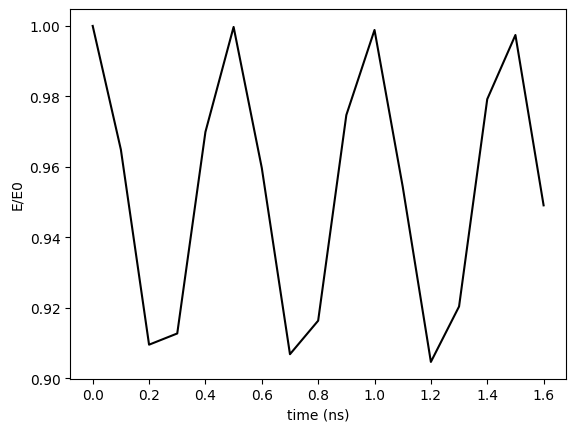

In [ ]:
#Energia a tots els passos
E=(m/2.0)*v*v+(k/2)*x*x
#Energia relativa (E/E0)
RE=E/E0
#Fem la gràfica de la relació d'energies respecte el temps
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Mostrar la gràfica
plt.show()

Com podem veure, amb aquest mètode també es conserva l'energia encara que hi hagi petites variacions al llarg del temps. Hi ha petites fluctuacions provocades per errors numèrics i perquè estem fent una mitjana de l'acceleració que no és del tot exacta. En qualsevol cas veiem que és simètric i l'energia es conserva en els dos mètodes.  

**2.- Escriviu l'equació d'Schrödinger en unitats SI i en unitats atòmiques per un exemple que hagiu
estudiat en les assignatures prèvies (per exemple, a Fenòmens Quantics I, II o a qualsevol altre).
Podeu revisar la definició d'unitats atòmiques en qualsevol dels links sobre aquestes unitats que
teniu al Campus Virtual (per exemple el link a Libre Text) o bé dels vostres apunts d'altres
assignatures.**

L'equació de Schrödinger s'escriu de la següent manera si tenim en compte que és independent del temps.

$ \hat{H} \cdot \psi (x)=E\cdot \psi $

$\frac{-ħ ^2} {2m}\cdot \frac {d^2}{dx^2}\cdot \psi (x)+V(x)\psi (x)=E\cdot \psi $

Si fem servir unitats atòmiques, fem les següents consideracions.


$ħ=e=m_e=4 \cdot π\cdot ε_0=1 $

I, per tant, ens queda ara:

$\frac{-1} {2}\cdot \frac {d^2}{dx^2}\cdot \psi (x)+V(x)\psi (x)=E\cdot \psi $

Ara farem un exemple d'un exercici de l'assignatura de Fenòmens quàntics I, més concretament ens centrarem en l'apartat c) del següent exercici.

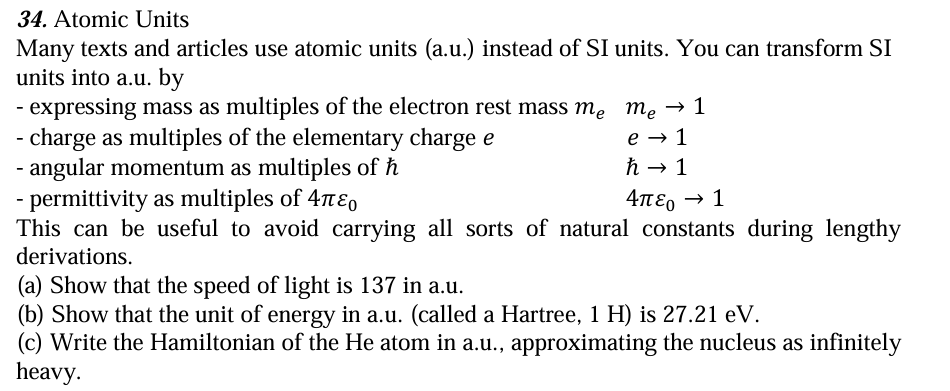

Escriurem el hamiltonià de l'equació de Schrödinger de l'àtom d'heli i veurem com se simplifica quan fem servir les unitats atòmiques. L'àtom d'heli té dos electrons, per tant, hem de tenir en compte l'energia cinètica dels dos electrons i l'energia potencial que tenen per escriure el hamiltonià. Amb unitats del sistema internacional quedaria de la següent manera:

$\frac {d^2}{dx^2}=Δ$

$\hat{H}_{SI} =-\frac{ħ ^2} {2m}\cdot Δ_1-\frac{ħ ^2} {2m}\cdot Δ_2-\frac{-2\cdot e^2}{4 \cdot π\cdot ε_0}\cdot(\frac {1}{r_1} + \frac {1}{r_2})+\frac {e^2}{4 \cdot π\cdot ε_0 \cdot r_{12}} $

I si fem servir les unitats atòmiques, simplifiquem l'operacional i ens queda així:

$\hat{H}_{au} =-\frac{1} {2}\cdot Δ_1-\frac{1} {2}\cdot Δ_2-\frac {2}{r_1} - \frac {2}{r_2}+\frac {1}{r_{12}} $

Com veiem, les unitats atòmiques simplifiquen molt els càlculs i es fan servir molt quan estem utilitzant l'equació de Schrödinger.